In [6]:
!git clone --depth=1 https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python.git
!pip install filterpy

Cloning into 'Kalman-and-Bayesian-Filters-in-Python'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 170 (delta 5), reused 91 (delta 2), pack-reused 0
Receiving objects: 100% (170/170), 20.11 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (5/5), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=dc836f4f97173a1e801768f324247d53af0e14c70c4974f72e8c5d1b874a9e86
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [7]:
%matplotlib inline

In [12]:
!cd Kalman-and-Bayesian-Filters-in-Python

/bin/bash: line 0: cd: Kalman-and-Bayesian-Filters-in-Python: No such file or directory


In [13]:
#format the book
import book_format
book_format.set_style()

In [16]:
!cd /kaggle/working/Kalman-and-Bayesian-Filters-in-Python/kf_book

### 思考実験による直観力の構築

私たちが体重計（立って体重を量る装置）のない世界に住んでいることを想像してみてください。ある日、職場で同僚があなたに駆け寄ってきて、「秤」の発明について発表しました。彼女が説明した後、あなたは熱心にその上に立ち、「172 ポンド」という結果を発表します。あなたは有頂天になります - 人生で初めて自分の体重を知ります。さらに重要なのは、このデバイスを世界中の減量クリニックに販売することを想像すると、ドル記号が目に浮かびます。これは素晴らしいです！

騒ぎを聞きつけた別の同僚がやって来て、あなたが何をそんなに興奮しているのかを知りました。あなたは発明について説明し、もう一度体重計に乗り、結果を誇らしげに宣言します。「161ポンド」。そしてあなたは躊躇し、混乱します。

「数秒前に172ポンドと表示されました」と同僚に愚痴をこぼします。

「私はそれが正確であるとは決して言いませんでした」と彼女は答えた。

センサーが不正確です。これがフィルタリングにおける膨大な作業の背後にある動機であり、この問題を解決することが本書の主題です。過去半世紀にわたって開発されたソリューションを提供することもできますが、これらのソリューションは、私たちが知っていることの性質とそれをどのように知るかについて、非常に基本的かつ根本的な質問をすることによって開発されました。数学を試す前に、その発見の旅をたどり、それがフィルタリングについての直感に役立つかどうかを確認してみましょう。

### 別のスケールを試してみる

この結果を改善する方法はあるでしょうか?当然のことですが、最初に試すべきことは、より優れたセンサーを入手することです。残念なことに、あなたの同僚は、10 台の体重計を作成したと報告しましたが、それらはすべてほぼ同じ精度で動作します。あなたは彼女に別の体重計を持ってきてもらい、一方の体重計で体重を量り、次にもう一方の体重計で体重を量ります。最初のスケール (A) は「160 ポンド」、2 番目のスケール (B) は「170 ポンド」と表示されます。あなたの体重についてどのような結論が得られますか?

さて、私たちの選択は何でしょうか？

A のみを信じて、推定体重に 160 ポンドを割り当てることもできます。
B だけを信じて、自分の体重に 170 ポンドを割り当てることもできます。
A と B の両方より小さい数を選択することもできます。
A と B の両方より大きい数値を選択することもできます。
A と B の間で数字を選択できます。

最初の 2 つの選択肢はもっともらしいですが、一方のスケールをもう一方のスケールよりも優先する理由はありません。なぜ私たちはBではなくAを信じることを選ぶのでしょうか?私たちがそのような信念を持つ理由はありません。 3 番目と 4 番目の選択肢は非合理的です。確かにスケールはそれほど正確ではありませんが、両方が測定した範囲外の数値を選択する理由はまったくありません。最終的な選択が唯一合理的な選択です。両方の体重計が不正確で、実際の体重を上回るか下回る結果が得られる可能性が高い場合、多くの場合、答えは A と B の間のどこかになります。

数学では、この概念は期待値として形式化されており、後で詳しく説明します。ここで、100 万回の読み取りを行った場合に「通常の」何が起こるかを自問してください。両方の秤の測定値が低すぎる場合もあれば、両方の測定値が高すぎる場合もあり、残りの場合は実際の重量にまたがります。実際の重量にまたがっている場合は、A と B の間の数値を選択する必要があります。またがっていない場合は、両方とも高すぎるか低すぎるかはわかりませんが、A と B の間の数値を選択することで、最悪の測定値の影響を最小限に抑えます。たとえば、実際の体重が 180 ポンドだとします。 160ポンドは大きな誤差です。ただし、160 ポンドと 170 ポンドの間の重量を選択した場合、推定値は 160 ポンドよりも良くなります。両方の秤が実際の重量より大きい値を返した場合にも、同じ議論が当てはまります。

これについては後ほど正式に扱いますが、今のところ、最良の推定値が A と B の平均であることが明らかであることを願っています。

$$
\frac{160 + 170}{2} = 165
$$

これをグラフで見てみましょう。 8 ポンドの誤差を想定して A と B の測定値をプロットしました。測定値は 160 ～ 170 ポンドの間であるため、意味のある唯一の重量は 160 ～ 170 ポンド以内でなければなりません。

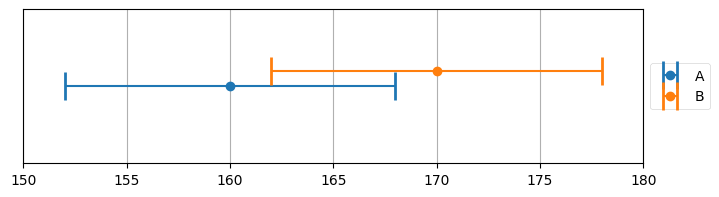

In [20]:
import kf_book.book_plots as book_plots
from book_plots import plot_errorbars

plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

このプロットをどのように作成したかについて一言。 kf_book サブディレクトリにあるモジュール book_plots からコードをインポートします。このプロットを生成するには、読んでも面白くない定型的な Python が大量に必要になります。私は本の中でこの考え方をよく取り上げています。セルが実行されると、plot_errorbars() が呼び出され、プロットがブックに挿入されます。

Jupyter Notebook を初めて使用する場合、上記のコードはセル内にあります。 「In [2]:」というテキストは、入力を入力できるセルとしてこれをラベル付けし、括弧内の数字は、このセルが 2 番目に実行されたことを示します。セルを実行するには、セルをクリックしてフォーカスを置き、キーボードの CTRL+ENTER を押します。続行すると、セル内のコードを変更して再実行できるようになります。値「160」、「170」、「8」を他の値に変更してセルを実行してみてください。入力した内容に応じて印刷出力が変わるはずです。

Lot_errorbars のコードを表示したい場合は、エディターでコードを開くか、新しいセルを作成して関数名とその後に 2 つの疑問符を入力します。 Ctrl+Enter を押すと、ブラウザでウィンドウが開き、ソース コードが表示されます。これは Jupyter Notebook の機能です。関数のドキュメントを参照するだけの場合は、疑問符を 1 つ付けて同じ操作を行います。

plot_errorbars??

または

plot_errorbars?

したがって、165 ポンドは妥当な推定値のように見えますが、活用できる可能性のある詳細情報がここにあります。可能な重量は、A と B のエラーバー間の交点にあるのみです。たとえば、スケール B では最大誤差 8 ポンドで 170 ポンドの読み取り値が得られないため、161 ポンドの重量は不可能です。同様に、スケール A では最大誤差 8 ポンドで 160 ポンドの読み取り値が得られないため、169 ポンドの重量は不可能です。この例では、可能な重量は 162 ～ 168 ポンドの範囲のみです。

まだ、より適切な重量推定値を見つけることはできませんが、「もしも」をもう少し考えてみましょう。 A が B よりも 3 倍正確であると言われたらどうなるでしょうか?上に挙げた 5 つのオプションを検討してください。 A と B の範囲外の数値を選択しても意味がありませんので、それらは考慮しません。おそらく、推定値として A を選択する方が説得力があるように思えます。結局のところ、A の方が正確であることがわかっているのに、B の代わりに A を使用しないのはなぜでしょうか。 B は A 単独よりも知識を向上させることができるでしょうか?

おそらく直感に反するかもしれない答えは、「はい、可能です」です。まず、A=160 と B=170 の同じ測定値を見てみましょう。ただし、A には誤差があります。
3ポンドとBの誤差は3倍の9ポンドです。

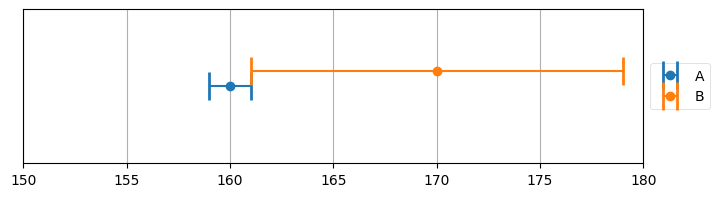

In [21]:
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims=(150, 180))

ここでは、可能な重量は 161 ポンドのみであることがわかります。これは重要な結果です。 2 つの比較的不正確なセンサーを使用して、非常に正確な結果を推定することができます。

したがって、センサーが 2 つある場合は、1 つがもう 1 つより精度が低くても、1 つよりも優れています。この本の残りの部分では、これについてハープしていきます。どんなに貧弱な情報であっても、私たちは決して捨てません。私たちは、考えられるすべての情報源を含めて可能な限り最良の推定値を作成できるようにする数学とアルゴリズムを開発する予定です。

しかし、私たちは問題からそれてしまいました。複数の体重計を購入したい顧客はいないでしょうし、それに加えて、私たちは当初、すべての体重計が同等（不正確）であるという仮定から始めました。精度に関係なくすべての測定値を使用するというこの洞察は、後で大きな役割を果たすため、忘れないでください。

体重計は 1 つしかないのに、何度も体重を量ったらどうなるでしょうか?同じ精度の 2 つのスケールがある場合、それらの測定結果を平均する必要があると結論付けました。 1 台の体重計で 10,000 回体重を計ったらどうなるでしょうか?スケールが大きすぎる数値を返す可能性と、小さすぎる数値を返す可能性が同じであることはすでに述べました。多数の重みの平均が実際の重みに非常に近いことを証明するのはそれほど難しいことではありませんが、とりあえずシミュレーションを書いてみましょう。数値計算には SciPy エコシステムの一部である NumPy を使用します。

In [22]:
import numpy as np
measuraments = np.random.uniform(160, 170, size=10000)

mean=measuraments.mean()
print(f'Average of measuraments is {mean:4f}')

Average of measuraments is 164.960765


出力される正確な数値は乱数ジェネレーターによって異なりますが、165 に非常に近いはずです。

このコードは、おそらく真実ではない 1 つの仮定を立てています。つまり、実際の重量が 165 ポンドの場合、スケールの読み取り値は 160 である可能性が 165 である可能性が高いということです。これはほとんど真実ではありません。実際のセンサーは、真の値に近い読み取り値を取得する可能性が高く、真の値から離れるほど読み取り値を取得する可能性が低くなります。これについてはガウスの章で詳しく説明します。ここでは、これ以上の説明はせずに numpy.random.normal() 関数を使用します。この関数は、165 ポンドに近づくとより多くの値を生成し、165 ポンドから離れるとより少ない値を生成します。現時点では、これにより実際のスケールの動作と同様のノイズの多い測定値が生成されることを信じてください。

In [23]:
mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measuraments is {mean:.4f}')

Average of measuraments is 164.9146


繰り返しますが、答えは 165 に非常に近いです。

よし、素晴らしい。センサーの問題に対する答えが見つかりました。しかし、それはあまり現実的な答えではありません。自分の体重を1万倍、さらには12倍にする忍耐力のある人は誰もいません。

それでは、「もしも」をプレイしてみましょう。 1 日に 1 回体重を測定し、測定値が 170、161、そして 169 になった場合はどうなるでしょうか。体重が増えたのでしょうか、減ったのでしょうか、それとも、これはすべてただのノイズの多い測定値なのでしょうか?

本当に何とも言えません。最初の測定値は 170、最後の測定値は 169 で、1 ポンドの減少を意味します。しかし、スケールが 10 ポンドまでしか正確でない場合、それはノイズによって説明可能です。実際に体重が増えた可能性もあります。おそらく初日の体重は 165 ポンドで、3 日目には 172 ポンドでした。その体重増加でそれらの体重測定値を取得することは可能です。体重計では体重が減っていると表示されていますが、実際には体重が増えています。それをグラフで見てみましょう。測定値をエラーバーとともにプロットし、それらの測定値によって説明できる可能性のある体重増加/減少を緑の点線でプロットしました。

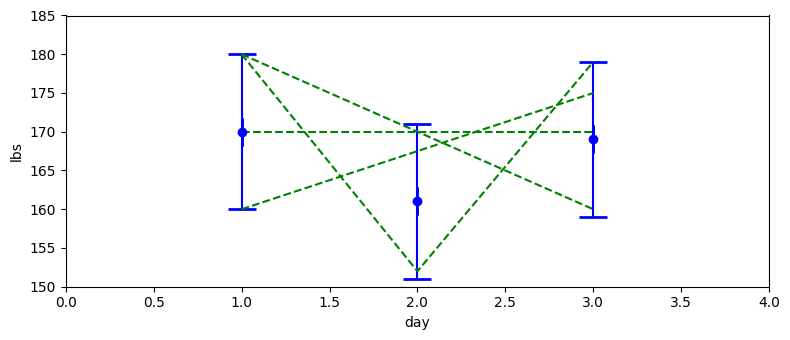

In [24]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

ご覧のとおり、これら 3 つの測定値によって説明できる極端な範囲の体重変化があります。実際、選択肢は無限にあります。諦めましょうか？私じゃない！人間の体重の測定について話していることを思い出してください。人間の体重が 1 日目に 180 ポンド、3 日目に 160 ポンドになることや、1 日で 30 ポンド体重が減って次の日には元に戻るという合理的な方法はありません (切断やその他の外傷が身体に起こっていないと仮定します)。人）。

私たちが測定している物理システムの動作は、測定値をどのように解釈するかに影響を与えるはずです。もし私たちが毎日岩石の重さを量っていたら、すべての変動はノイズのせいだと考えてしまうでしょう。雨によって養われ、家事に使用される水槽の重量を量っていたら、そのような重量の変化は本物だと信じるかもしれません。

別のスケールを使用して、次の測定値が得られたとします: 169、170、169、171、170、171、169、170、169、170。あなたの直感は何を言いますか?たとえば、毎日 1 ポンド増加したのに、ノイズの多い測定値がたまたま同じ体重のままであるように見える可能性があります。同様に、1 日あたり 1 ポンド減量しても同じ測定値が得られた可能性があります。しかし、その可能性はあるでしょうか？コインを投げて 10 回連続で表が出る確率はどのくらいですか?あまり可能性は高くありません。これらの測定値のみに基づいてそれを証明することはできませんが、私の体重は一定に保たれていた可能性がかなり高いと思われます。下のグラフでは、測定値を誤差バーでプロットし、おそらく真の重量を緑色の点線でプロットしました。この破線は、この問題に対する「正しい」答えを意味するものではなく、単に合理的であり、測定によって説明できるものにすぎません。

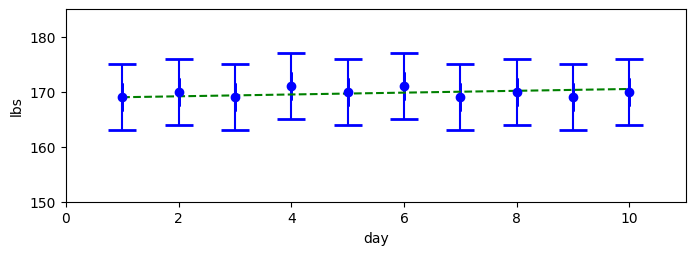

In [25]:
gh.plot_hypothesis2()

もう 1 つの仮定: 測定値が 158.0、164.2、160.3、159.9、162.1、164.6、169.6、167.4、166.4、171.0 だったらどうなるでしょうか?そのグラフを見て、いくつかの質問に答えてみましょう。

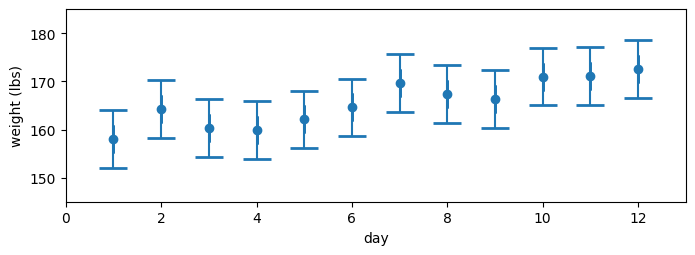

In [26]:
gh.plot_hypothesis3()

私が体重を減らしたように「見える」のですが、これは単なるノイズの多いデータでしょうか?あまり。おそらく私も同じ体重だったのではないでしょうか？繰り返しますが、いいえ。このデータは時間の経過とともに増加する傾向にあります。均等ではありませんが、確実に上向きです。確かなことはできませんが、体重が大幅に増加しているようです。この仮定をさらにいくつかのプロットでテストしてみましょう。多くの場合、表よりもグラフの方がデータを「注目」するのが簡単です。

そこで、2 つの仮説を見てみましょう。まず、体重が変わらなかったと仮定します。この数値を取得するには、測定値を平均する必要があることに同意しました。それを見てみましょう。

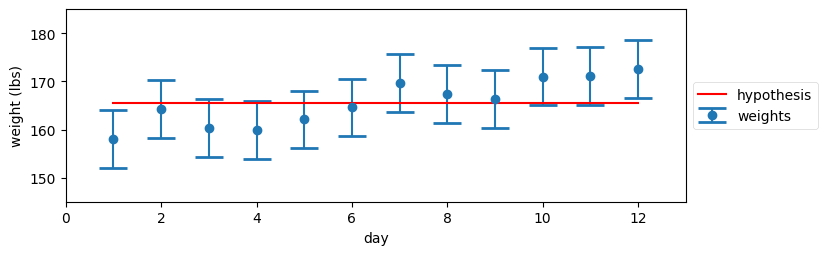

In [27]:
gh.plot_hypothesis4()

それはあまり説得力がありません。実際、すべての誤差範囲内にある水平線を引くことはできないことがわかります。

さて、体重が増えたとしましょう。いくら？わかりませんが、NumPy は知っています。測定結果から「およそ」正しく見える線を引きたいと考えています。 NumPy には、「最小二乗適合」と呼ばれるルールに従ってこれを行う関数があります。計算の詳細については気にせず (興味があれば、polyfit() を使用します)、結果をプロットするだけにしてみましょう。

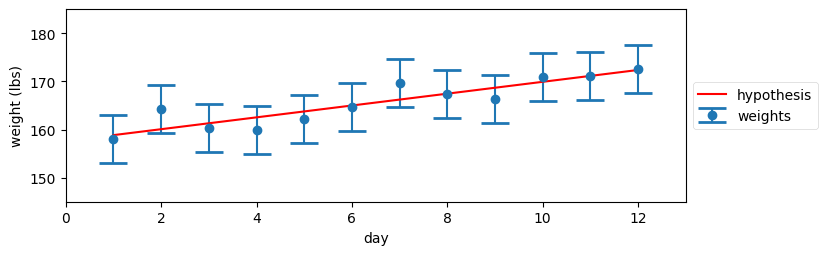

In [28]:
gh.plot_hypothesis5()

少なくとも私の目には、この方がはるかに良く見えます。ここで、仮説が各測定値の非常に近くにあることに注目してください。一方、前のプロットでは、仮説は測定値からかなり離れていることがよくありました。体重が増えなかったというよりも、体重が増えたというほうが真実である可能性がはるかに高いようです。実際に13ポンド増えたでしょうか？誰が言えるの？それは答えるのが不可能のようです。

「でもそれは不可能ですか？」同僚にパイプをする。

クレイジーなことを試してみましょう。 1 日に約 1 ポンドずつ体重が増えていることがわかっていると仮定しましょう。今それをどのように知っているかは問題ではありません。それがほぼ正しいと知っていると仮定してください。おそらく私は1日6000カロリーのダイエットをしているので、これほど体重が増加するでしょう。あるいは、体重増加を推定する別の方法があるかもしれません。これは思考実験であり、詳細は重要ではありません。そのような情報が利用可能であれば、それを利用できるかどうかを見てみましょう。

最初の測定値は 158 でした。それ以外を知る方法はないので、これを推定値として受け入れましょう。今日の体重が 158 なら、明日は何になるでしょうか?さて、体重は 1 日あたり 1 ポンド増加していると考えられるため、予測は次のように 159 になります。

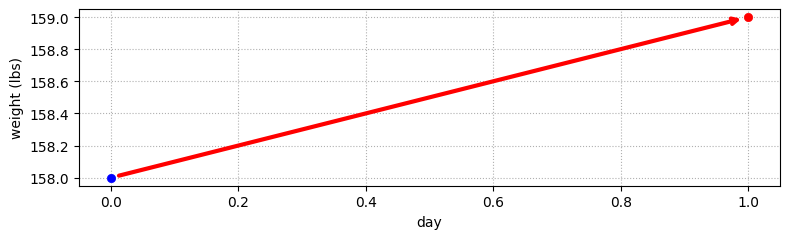

In [29]:
gh.plot_estimate_chart_1()

わかったけど、これって何の役に立つの？確かに、1 ポンド/日が正確であると仮定して、次の 10 日間の体重を予測することはできますが、その測定値を組み込んでいないのに、そもそも体重計を使用する必要はありません。それでは、次の測定を見てみましょう。もう一度体重計に乗ると、164.2ポンドと表示されます。

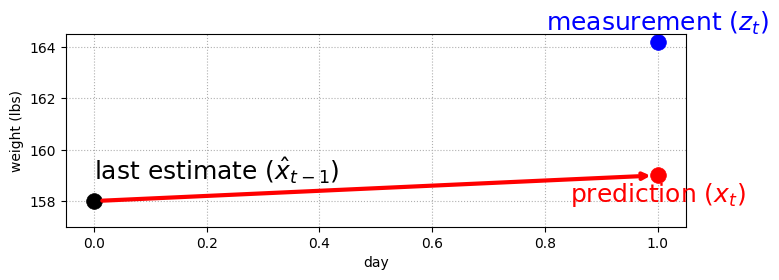

In [30]:
gh.plot_estimate_chart_2()

問題があります。私たちの予測は測定値と一致しません。しかし、それは私たちが期待していたものですよね？予測が常に測定値とまったく同じである場合、フィルターに情報を追加することはできません。そしてもちろん、私たちの予測は完璧なので、測定する理由はありません。

この本全体に対する重要な洞察は次の段落にあります。よく読んでください！

どうしようか？測定値から推定値を作成するだけの場合、予測は結果に影響しません。予測から推定値を作成するだけの場合、測定値は無視されます。これが機能するためには、予測と測定を何らかの形で組み合わせる必要があります (重要な点を太字にしました)。

2 つの値をブレンドする - これは、前述の 2 つのスケールの問題によく似ています。前と同じ推論を使用すると、意味のある唯一のことは、予測と測定の間で数値を選択することであることがわかります。たとえば、165 という推定値は意味がありません。157 も意味がありません。推定値は 159 (予測) と 164.2 (測定値) の間にある必要があります。

もう一度言いますが、これは非常に重要です。私たちは、誤差のある 2 つの値が提示された場合、2 つの値の間の途中で推定値を作成する必要があることに同意しました。これらの値がどのように生成されたかは関係ありません。この章の最初では 2 つの測定値がありましたが、現在は 1 つの測定値と 1 つの予測値になっています。どちらの場合でも、推論、つまり数学は同じです。私たちは情報を決して捨てません。私は真剣です。ノイズの多いデータを破棄する商用ソフトウェアがたくさんあります。やめてください！体重増加の予測はあまり正確ではないかもしれませんが、何らかの情報がある限りそれを使用する必要があります。

立ち止まって真剣に考えてみてください。私がやったことは、不正確な体重計を人間の生理学に基づいた不正確な体重予測に置き換えただけです。やはりデータです。数学では、データがスケールから来たのか、それとも予測から来たのかはわかりません。ある程度のノイズを含む 2 つのデータがあり、それらを結合したいと考えています。この本の残りの部分では、この計算を実行するためのかなり複雑な数学を開発していきますが、数学ではデータがどこから来たのかはまったく気にされず、それらの値の値と精度に基づいて計算が行われるだけです。

推定値は測定値と予測値の中間にあるべきですか?おそらくですが、一般的には、測定値と比較して予測が多かれ少なかれ正確であることがわかっているようです。おそらく、私たちの予測の精度はスケールの精度とは異なります。スケール A がスケール B よりもはるかに正確だったときに行ったことを思い出してください。答えを B よりも A に近くなるようにスケールしました。これをグラフで見てみましょう。

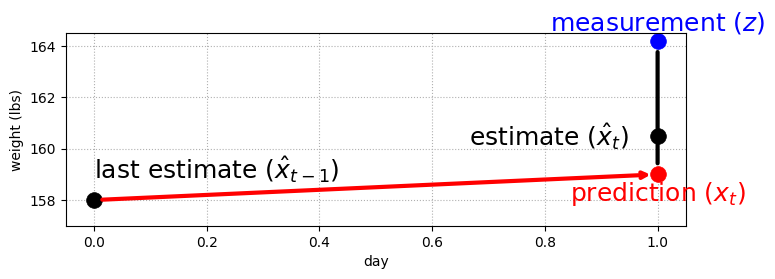

In [31]:
gh.plot_estimate_chart_3()

次に、ランダムに選択した数値を試して推定値をスケールしてみましょう。

。私たちの推定値は測定値の 10 分の 4 で、残りは予測に基づくものになります。言い換えれば、ここでは信念、つまり予測の方が測定よりも正しい可能性がいくらか高いという信念を表現しているのです。それを次のように計算します

$$
estimate = prediction + \frac{4}{10}(measurement- prediction)
$$

測定値と予測値の差は残差と呼ばれ、上のプロットでは黒い縦線で示されています。これは測定値とフィルターの出力の差を正確に計算したものであるため、後で使用する重要な値になります。残差が小さいほど、パフォーマンスが向上することを意味します。

これをコーディングして、上記の一連の重みに対してテストした結果を見てみましょう。もう 1 つの要素を考慮する必要があります。体重増加の単位はポンド/時間なので、一般的には時間ステップtを追加する必要があります。

、これを 1 (日) に設定します。

私は、実際の開始体重 160 ポンドと 1 日あたり 1 ポンドの体重増加に対応する体重データを手動で生成しました。つまり、初日 (0 日目) の真の体重は 160 ポンド、2 日目 (1 日目、計量初日) の真の体重は 161 ポンド、というようになります。

初期重量を推測する必要があります。初期化戦略について話すのは時期尚早なので、今のところは 160 ポンドを想定します。

In [39]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):
    # フィルターした結果を保存する
    estimates, predictions = [estimated_weight], []
    
    # 多くのフィルターに関する文献ではzを測定した観測値を表す
    for z in weights:
        # 新しい値を予測する
        predicted_weight = estimated_weight + gain_rate*time_step
        
        # フィルターの更新
        estimated_weight = predicted_weight + scale_factor* (z- predicted_weight)
        
        # 結果を保存しログをとる
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
            
    return estimates, predictions

initial_estimate = 160
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

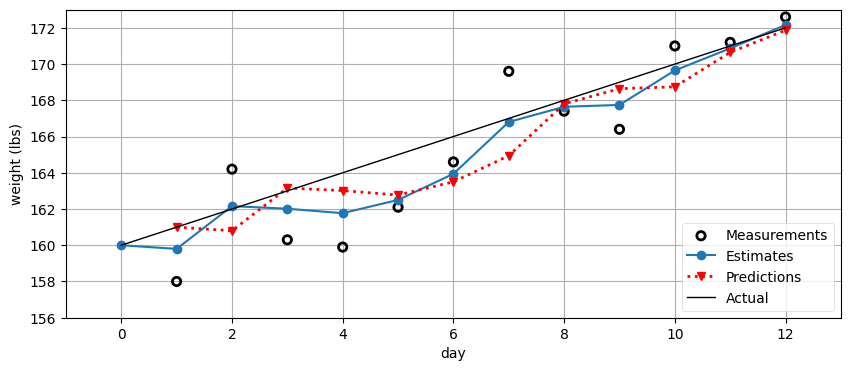

In [40]:
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights

それはかなり良いですね！ここには大量のデータがあるので、それをどのように解釈するかについて話しましょう。青い太い線はフィルターからの推定値を示します。最初の推定体重は 160 ポンドで、0 日目から始まります。赤い線は前日の体重からの予測を示しています。したがって、1 日目の以前の体重は 160 ポンドで、体重増加は 1 ポンドであるため、最初の予測は 161 ポンドになります。 1 日目の推定値は 159.8 ポンドで、予測と測定の間の中間になります。グラフの下には、毎日の以前の体重、予測体重、新しい推定値が印刷されています。最後に、細い黒い線は、体重を測定される人の実際の体重増加を示します。

これを毎日確認して、各ステップで予測と推定がどのように形成されたかを確実に理解してください。推定値が常に測定値と予測値の間にあることに注目してください。

推定値は直線ではありませんが、測定値よりも直線であり、作成した傾向線にいくらか近くなっています。また、時間の経過とともに改善されるようです。

フィルタの結果は非常にばかげているように思えるかもしれません。もちろん、体重増加が 1 日あたり約 1 ポンドであるという結論を仮定すると、データは良好に見えます。最初の推測が間違っていた場合にフィルターが何をするかを見てみましょう。 1 日に 1 ポンドの体重減少があると予測してみましょう。